In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## OLS from Scratch

In [3]:
def normalEqn(X, y):

    # Add intercept
    m  = len(X)
    b  = np.ones((m,1))
    Xb = np.concatenate([b, X], axis=1)

    # Normal equation
    tmp1 = Xb.T.dot(Xb)
    tmp2 = Xb.T.dot(y)

    '''
    Matrix inverse is slow and introduces unnecessary error
    Anytime you see the math written as: x = A^-1 * b
    you instead want: x = np.linalg.solve(A, b)
    '''
    return np.linalg.solve(tmp1, tmp2)

In [4]:
X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = np.array([7,9,12,15,16])

b, a = normalEqn(X, Y)
print(b,a)

4.599999999999996 2.400000000000001


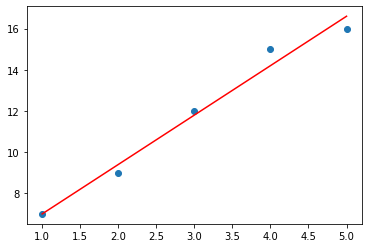

In [5]:
plt.scatter(X,Y)

_X = np.arange(X.min(), X.max()+1, 1)
_Y = a*_X+b
plt.plot(_X, _Y, '-r')

## OLS with Statsmodels

In [7]:
import statsmodels.api as sm

In [8]:
def ols(X, y):
    Xb = sm.add_constant(X)

    est = sm.OLS(Y, Xb).fit()
    return est.params

In [9]:
ols(X, Y)

array([4.6, 2.4])

---

## Multiple regression

### Load data

In [11]:
!wget http://cda.psych.uiuc.edu/coursefiles/st01/carsmall.mat

--2020-10-22 13:30:36--  http://cda.psych.uiuc.edu/coursefiles/st01/carsmall.mat
Résolution de cda.psych.uiuc.edu (cda.psych.uiuc.edu)… 128.174.199.77
Connexion à cda.psych.uiuc.edu (cda.psych.uiuc.edu)|128.174.199.77|:80… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 12344 (12K)
Enregistre : «carsmall.mat»

carsmall.mat        100%[===================>]  12,05K  --.-KB/s    ds 0s      

2020-10-22 13:30:36 (30,3 MB/s) - «carsmall.mat» enregistré [12344/12344]



In [12]:
from scipy.io import loadmat

mat = loadmat('carsmall.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Model', 'Origin', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model_Year'])

In [13]:
df = pd.DataFrame()

for k in mat.keys():
    if k.startswith('__'):
        continue
    df[k] = mat[k]

df.head()

,Model,Origin,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year
0,chevrolet chevelle malibu,USA,18.0,8,307,130.0,3504,12.0,70
1,buick skylark 320,USA,15.0,8,350,165.0,3693,11.5,70
2,plymouth satellite,USA,18.0,8,318,150.0,3436,11.0,70
3,amc rebel sst,USA,16.0,8,304,150.0,3433,12.0,70
4,ford torino,USA,17.0,8,302,140.0,3449,10.5,70


In [14]:
df.dtypes

Model            object
Origin           object
MPG             float64
Cylinders         uint8
Displacement     uint16
Horsepower      float64
Weight           uint16
Acceleration    float64
Model_Year        uint8
dtype: object

In [15]:
df.shape

(100, 9)

In [16]:
df.dropna(subset=['Weight', 'Horsepower', 'MPG'], inplace=True)
df.shape

(93, 9)

In [18]:
X = df[['Weight', 'Horsepower']].values
Y = df['MPG'].values

print(X.shape, Y.shape)

(93, 2) (93,)


### Fit

In [19]:
a = normalEqn(X, Y)
a

array([ 4.77694303e+01, -6.56512617e-03, -4.20178399e-02])

In [23]:
a = ols(X, Y)
a

array([ 4.77694303e+01, -6.56512617e-03, -4.20178399e-02])

### Compute r-squared

In [21]:
# Add intercept
m  = len(X)
b  = np.ones((m,1))
Xb = np.concatenate([b, X], axis=1)

# Prediction
predictedY = np.dot(Xb, a)

# calculate the r-squared
SSres    = Y - predictedY
SStot    = Y - Y.mean()
rSquared = 1 - (SSres.dot(SSres) / SStot.dot(SStot))
print("r-squared: ", rSquared)

r-squared:  0.7520529994716305


### Plot

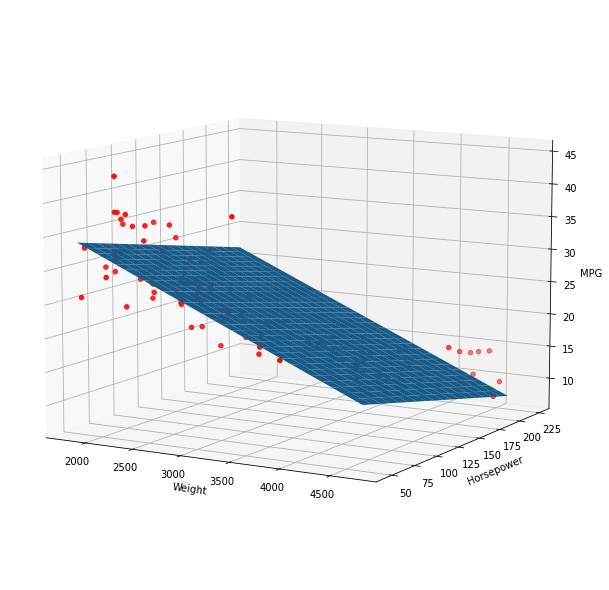

In [22]:
x1fit = np.arange(X[:,0].min(), X[:,0].max()+1, 100)
x2fit = np.arange(X[:,1].min(), X[:,1].max()+1, 10)

X1FIT,X2FIT = np.meshgrid(x1fit, x2fit)
YFIT = a[0] + a[1]*X1FIT + a[2]*X2FIT

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='r', label='Actual BP')
ax.plot_surface(X1FIT,X2FIT,YFIT)

'''
print('ax.azim {}'.format(ax.azim))
print('ax.elev {}'.format(ax.elev))
'''
ax.view_init(10,-60)

ax.set_xlabel('Weight')
ax.set_ylabel('Horsepower')
ax.set_zlabel('MPG')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)